# <center> Practice Case 4
## <center> Machine Learning: Making a Prediction for Flight Delay
    
    
Here in this notebook, I would like to analyze the dataset of malaysian flights from October 2018 until November 2018. Out of this dataset, a machine learning model will be built and trained and then used to predict flight delays for the next month (December 2018).

    Author: Tri Juliansyah Muharam Sambas
    Date: 4th November 2019

## Outline
- Import Libraries
- Import Dataset
- Data Cleaning
    * Missing values
    * Duplicate entries
- Data Preparation
    * Feature Engineering
- Exploratory Data Analysis
- Modeling & Evaluation
    * Linear Regression
    * Logistic Regression (PARTIALLY FINISHED)
    * XGBoost Model (NOT YET FINISHED)
- Conclusion (NOT YET FINISHED)

## TLDR; Executive Summary
1. **Provide travel recommendation to passenger (best time to take a flight or best airline), so they will not get caught in delay. Each recommendation has to be supported by at least 1 graph.**  
From the Exploratory Data Analysis, I found that there at least three things that could be factors to make a flight recommendation, those are:
    * **_Flight schedules_**  
    Flight schedules can be broken down into three type of data, day of the month (from 1st to 31st of the month, _left_), day of the week (_middle_) and hour time category (_right_). **The best recommendation** for flight schedule would be in **the 3rd week of the month** (since beginning and end of the month less busy but higher chance of delay), on **Monday, Saturday, Sunday or Wednesday** (lower percentage of flight delay happened) and in **the evening or midnight**. If we can have a flight schedule which satisfy those three criteria, it has lower chance to be delayed.
![Suggestion 1](https://github.com/TJMSambas/D11_practice_case_4_tri/blob/master/Picture3.png?raw=true)
    * **_Airlines_**  
    There are two type of suggestions for choosing airlines. On the one hand is the most on-time flight out of three months and on the other hand is the must be avoided airlines. In the most on-time airlines we have,
        - Firefly
        - United Airlines
        - Vietnam Airlines  
![Suggestion 4](https://github.com/TJMSambas/D11_practice_case_4_tri/blob/master/Picture1.png?raw=true)  

    All of them have a great achievement in keeping their flight schedules on-time in three consecutive months whereas in the must be avoided airlines, we have airlines who failed to run their schedules on-time more than **5%** of their flights,
        - AirAsia
        - Malindo Air
        - Lion Air
![Suggestion 5](https://github.com/TJMSambas/D11_practice_case_4_tri/blob/master/Picture2.png?raw=true)
    * **_Airports_**  
    Besides time schedules and airlines itself, airports also have a crucial role in determining flight delay. Busy airports tend to allow more flight delay. However, **Kuala Lumpur International Airport** as the busiest airport in Malaysia still keeps their record below **5%** which is quite good for such a busy airport. Nevertheless, if your flight is available on the other airports such as the city of **Sibu and Marudi**, it would decrease the chance of your flight being delayed.

![Suggestion 6](https://github.com/TJMSambas/D11_practice_case_4_tri/blob/master/airport.PNG?raw=true)

2. **Create a model to estimate the delay duration ( Linear Regression )**  
A linear model has been built in this notebook by incorporating feature engineering out of categorical variables and numerical variables. In the beginning, the model has been fed **587 predictors** in which the performance is far from ideal. To enhance the performance of the model, I did feature selection by doing a statistical t-test and select predictors which give significant to the model. Furthermore, I also remove the possibility of multicollinearity between predictors by computing linear correlation of each predictor and select the one with **correlation coefficient between predictors < 0.4** and has **coefficient to the target > 0.025**. Thus, in the final predictors, I can select **28 predictors out of 587 predictors**. However, the general performance is still far from optimal. It only has **R-squared value less than 0.1**. More feature engineering is need to optimize the result by using current dataset to improve the performance of the model.

3. **Create a model to predict delay > 60 min ( Logistic regression and another supervised model you choosing )**  
In this model, I created a logistic regression model out of all predictors compared to selected predictors as previously mentioned. Still, the results are still far from optimal. The model fails to predict the flight delay completely on standard model and only 1% F-score on features selected model. Further analysis is needed to create a better model.

4. **Did you do some feature engineering on the dataset ? if yes, please give the reason for each feature you created**  
(Explained on each section)

5. **Using those models predict delay that will happened in December for delay >60**  
(Have been explained in Q.3)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import Dataset
### Training

In [2]:
flight_df = pd.read_csv('../Data/training_dataset.csv')
flight_df.head(3)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,1,AK6430,AK,AirAsia,2018-10-05 22:00:00,2018-10-05 23:05:00,Kuala Lumpur,KUL,MY,J15,...,MY,2,Sultan Ismail Petra Airport,Asia,NaN,Asia/Kuala_Lumpur,32S,Airbus A318 / A319 / A320 / A321,58m,2
1,2,ID*7164,ID*,Batik Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8
2,3,MXD9116,MXD,Malindo Air,2018-10-05 22:00:00,2018-10-05 23:55:00,Kuala Lumpur,KUL,MY,C33,...,ID,5,Soekarno-Hatta International Airport,Asia,2,Asia/Jakarta,32S,Airbus A318 / A319 / A320 / A321,1h 55m,8


In [3]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111068 entries, 0 to 111067
Data columns (total 26 columns):
id                            111068 non-null int64
number                        111068 non-null object
airline                       111068 non-null object
airline_name                  111068 non-null object
scheduled_departure_time      111068 non-null object
scheduled_arrival_time        111063 non-null object
departure_airport_city        111068 non-null object
departure_airport_code        111068 non-null object
departure_airport_country     111068 non-null object
departure_airport_gate        66859 non-null object
departure_airport_name        111068 non-null object
departure_airport_region      111068 non-null object
departure_airport_terminal    69728 non-null object
departure_airport_timezone    111068 non-null object
arrival_airport_city          111068 non-null object
arrival_airport_code          111068 non-null object
arrival_airport_country       111068 non-nul

### Test

In [4]:
test_df = pd.read_csv('../Data/test_dataset.csv')
test_df.head(3)

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay
0,483244,CZ7412,CZ,China Southern Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
1,483245,MH5712,MH,Malaysia Airlines,2018-12-01 00:00:00,2018-12-01 04:40:00,Kuala Lumpur,KUL,MY,C11,...,CN,NaN,Changle International Airport,Asia,NaN,Asia/Shanghai,738,Boeing 737-800 Passenger,4h 40m,15
2,483246,TK8186,TK,Turkish Airlines,2018-12-01 00:00:00,2018-12-01 02:40:00,Kuala Lumpur,KUL,MY,A4,...,MY,NaN,Kota Kinabalu International Airport,Asia,NaN,Asia/Kuala_Lumpur,738,Boeing 737-800 Passenger,2h 40m,27


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41557 entries, 0 to 41556
Data columns (total 26 columns):
id                            41557 non-null int64
number                        41557 non-null object
airline                       41557 non-null object
airline_name                  41557 non-null object
scheduled_departure_time      41557 non-null object
scheduled_arrival_time        41555 non-null object
departure_airport_city        41557 non-null object
departure_airport_code        41557 non-null object
departure_airport_country     41557 non-null object
departure_airport_gate        25147 non-null object
departure_airport_name        41557 non-null object
departure_airport_region      41557 non-null object
departure_airport_terminal    26309 non-null object
departure_airport_timezone    41557 non-null object
arrival_airport_city          41557 non-null object
arrival_airport_code          41557 non-null object
arrival_airport_country       41557 non-null object
arrival_

### Merging Training-Test

In [6]:
flight_df = pd.concat([flight_df,test_df], axis = 0)

### Dataset Quick Review

From this quick review, I found that **not all the categorical variables supposedly being categorical**. This insight come from the fact that the unique number is far too many to be grouped as categories and some of them are supposed to be numerical. For example, **flight duration** is presented in hour and minutes while it could also be transformed to fully numerical (in hours or minutes) and **departure and arrival time** could also be manipulated as datetime type of variable so that one could analyze it specifically based on clock time.

In [7]:
categorical = list(flight_df.dtypes[flight_df.dtypes == 'object'].index)

In [8]:
categ_len = []
for category in categorical:
    categ_len.append(flight_df[category].value_counts().shape[0])
    
categ_df = pd.DataFrame({'categorical':categorical, 'unique_number': categ_len})
display(categ_df.sort_values(by = 'unique_number'))

,categorical,unique_number
12,departure_airport_timezone,1
10,departure_airport_region,1
7,departure_airport_country,1
18,arrival_airport_region,4
11,departure_airport_terminal,6
5,departure_airport_city,16
9,departure_airport_name,17
6,departure_airport_code,17
19,arrival_airport_terminal,17
15,arrival_airport_country,39


In [9]:
numerical = list(flight_df.dtypes[flight_df.dtypes != 'object'].index)
numerical

['id', 'delay']

## Data Cleaning

### Missing Values

There are only four columns which have null values more than **50%**, those are:
* arrival_airport_gate (more than **80%**)
* arrival_airport_terminal (about **50%**)
* departure_airport_gate (about **40%**)
* departure_airport_terminal (about **40%**)

while the rest are less than **5%**. Since the entries of these columns are not relevant and too many null values, I decided not to include this into the modeling.

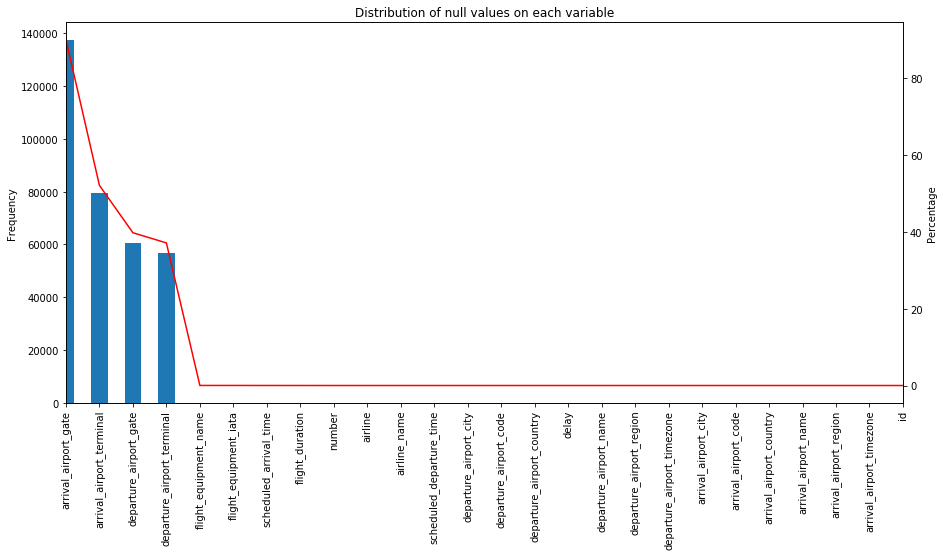

In [10]:
plt.figure(figsize = (15,7))
plt.title('Distribution of null values on each variable')
ax = flight_df.isnull().sum().sort_values(ascending = False).plot.bar()
ax.set_ylabel('Frequency')
ax.twinx()
ax1 = (flight_df.isnull().sum()/flight_df.isnull().count()*100).sort_values(ascending = False).plot.line(color = 'red')
ax1.set_ylabel('Percentage')
plt.show()

In [11]:
flight_df[['arrival_airport_gate','arrival_airport_terminal','departure_airport_gate','departure_airport_terminal']].head(3)

,arrival_airport_gate,arrival_airport_terminal,departure_airport_gate,departure_airport_terminal
0,2,NaN,J15,2
1,5,2,C33,M
2,5,2,C33,M


### Duplicate Entries

There is no **duplicated values** found in the dataset.

In [12]:
flight_df[flight_df.duplicated()]

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_country,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay


## Data Preparation

### Feature Engineering

#### Flight Duration (Actual)

There are two flight number without flight duration. By a little bit of googling, I found that:
* Flight Number VI1179 has duration 6h 51m in total (source can be found [here](https://flightaware.com/live/flight/VDA1179))
* Flight Number NZ6091 has duration 4h 14m in total (source can be found [here](https://uk.flightaware.com/live/flight/ANZ6091))

The flight date is different but to avoid removing the entries, one could assume the flight duration more or less the same.

In [13]:
flight_df.loc[flight_df['number'] == 'VI1179','flight_duration'] = '6h 51m'
flight_df.loc[flight_df['number'] == 'NZ6091','flight_duration'] = '4h 14m'

Making **a function to convert flight duration into minutes** using regular expression.

In [14]:
import re
def convert_to_minutes(data):
    dummy = data.split()
    if len(dummy) == 2:
        dummy[0] = int(re.findall(r'\d+', dummy[0])[0])
        dummy[1] = int(re.findall(r'\d+', dummy[1])[0])
        return dummy[0]*60 + dummy[1]
    elif 'h' in dummy[0]:
        dummy[0] = int(re.findall(r'\d+', dummy[0])[0])
        return dummy[0]*60
    else:
        return int(re.findall(r'\d+', dummy[0])[0])

In [15]:
flight_df['flight_duration_mod'] = flight_df['flight_duration'].apply(convert_to_minutes)

#### Scheduled & Arrival Time

Converting str type of variable into datetime variable to make the analysis easier for date time type of data.

In [16]:
from datetime import datetime
date_format = '%Y-%m-%d %H:%M:%S'
def convert_to_datetime(data):
    return datetime.strptime(data,date_format)

def convert_to_string(data):
    return datetime.strftime(data,date_format)

In [17]:
flight_df['scheduled_departure_time'] = flight_df['scheduled_departure_time'].apply(convert_to_datetime)

Converting non-null values of arrival time:

In [18]:
flight_df.loc[~flight_df['scheduled_arrival_time'].isnull(), 'scheduled_arrival_time'] = flight_df.loc[~flight_df['scheduled_arrival_time'].isnull(), 'scheduled_arrival_time'].apply(convert_to_datetime)

In [19]:
flight_df['scheduled_arrival_time'] = pd.to_datetime(flight_df['scheduled_arrival_time'])

I found null values on four flight numbers with five flight arrival schedules, those are:
* CX5691
* KA691
* VI1179
* NZ6091

Combining with the previous information (flight duration) and scheduled departure time **(assume the delay is due to the late departure, not because of late arrival)** then we can generate scheduled arrival time.

In [20]:
flight_df[flight_df['scheduled_arrival_time'].isnull()]

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_duration_mod
8167,8266,CX5691,CX,Cathay Pacific,2018-10-09 12:45:00,NaT,Kuala Lumpur,KUL,MY,C12,...,NaN,Penang International Airport,Asia,NaN,Asia/Kuala_Lumpur,333,Airbus A330-300,52m,32,52
8168,8267,KA691,KA,Cathay Dragon,2018-10-09 12:45:00,NaT,Kuala Lumpur,KUL,MY,C12,...,NaN,Penang International Airport,Asia,NaN,Asia/Kuala_Lumpur,333,Airbus A330-300,52m,32,52
38176,111993,VI1179,VI,Volga-Dnepr,2018-10-25 23:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,A.B. Won Pat International Airport,Oceania,NaN,Pacific/Guam,NaN,NaN,6h 51m,10,411
100795,426916,NZ6091,NZ,Air New Zealand,2018-11-26 04:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,Cairns Airport,Oceania,NaN,Australia/Brisbane,NaN,NaN,4h 14m,0,254
100798,426919,NZ6091,NZ,Air New Zealand,2018-11-26 04:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,Cairns Airport,Oceania,NaN,Australia/Brisbane,NaN,NaN,4h 14m,0,254
328,483577,NZ6091,NZ,Air New Zealand,2018-12-01 04:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,Cairns Airport,Oceania,NaN,Australia/Brisbane,NaN,NaN,4h 14m,0,254
330,483579,NZ6091,NZ,Air New Zealand,2018-12-01 04:00:00,NaT,Kuala Lumpur,KUL,MY,NaN,...,NaN,Cairns Airport,Oceania,NaN,Australia/Brisbane,NaN,NaN,4h 14m,0,254


In [21]:
from datetime import timedelta
def convert_to_timedelta(data):
    return timedelta(minutes = data)

In [22]:
flight_df.loc[flight_df['scheduled_arrival_time'].isnull(), 'scheduled_arrival_time'] = \
flight_df.loc[flight_df['scheduled_arrival_time'].isnull(), 'scheduled_departure_time'] + \
flight_df.loc[flight_df['scheduled_arrival_time'].isnull(), 'flight_duration_mod'].apply(convert_to_timedelta)

In [23]:
flight_df[flight_df['scheduled_arrival_time'].isnull()]

,id,number,airline,airline_name,scheduled_departure_time,scheduled_arrival_time,departure_airport_city,departure_airport_code,departure_airport_country,departure_airport_gate,...,arrival_airport_gate,arrival_airport_name,arrival_airport_region,arrival_airport_terminal,arrival_airport_timezone,flight_equipment_iata,flight_equipment_name,flight_duration,delay,flight_duration_mod


#### Flight Duration (Scheduled)

From the current scheduled departure and arrival, I generate the **scheduled flight duration**.

In [24]:
def convert_to_minutes_from_timedelta(data):
    return data.seconds/60

In [25]:
flight_df['flight_duration_scheduled'] = (flight_df['scheduled_arrival_time'] - flight_df['scheduled_departure_time']).apply(convert_to_minutes_from_timedelta)

#### Delayed>60
Generating variable delayed > 60 minutes.

In [26]:
flight_df['delay>60'] = flight_df['delay'].apply(lambda x: 1 if x > 60 else 0)

#### Time Category
Grouping flight time based on usual standard time in a day to make analysis easier.

In [27]:
def convert_to_time_category(data):
    hour = data.hour
    if (hour >= 6) & (hour < 12):
        return 'morning'
    elif (hour >= 12) & (hour < 18):
        return 'afternoon'
    elif (hour >= 18) & (hour < 24):
        return 'evening'
    else:
        return 'midnight'

In [28]:
flight_df['flight_time_category'] = flight_df['scheduled_departure_time'].apply(convert_to_time_category)

#### Name Day of the Week
Grouping flight time based on usual standard day in a week to make analysis easier.

In [29]:
day_format = "%A"
def convert_to_day_of_week(data):
    return data.strftime(day_format)

In [30]:
flight_df['day_of_week'] = flight_df['scheduled_departure_time'].apply(convert_to_day_of_week)

#### Month Name
Grouping flight time based on usual standard month to make analysis easier.

In [31]:
month_format = "%B"
def convert_to_month(data):
    return data.strftime(month_format)

In [32]:
flight_df['month_name'] = flight_df['scheduled_departure_time'].apply(convert_to_month)

#### Day of the Month
Grouping flight time based on usual standard day in a month to make analysis easier.

In [33]:
day_format = "%d"
def convert_to_day(data):
    return data.strftime(day_format)

In [34]:
flight_df['day'] = flight_df['scheduled_departure_time'].apply(convert_to_day)

## Exploratory Data Analysis
Here a lot of graphs will be built.

In [35]:
# updating numerical and categorical data
numerical = list(flight_df.dtypes[flight_df.dtypes != 'object'].index)
categorical = list(flight_df.dtypes[flight_df.dtypes == 'object'].index)

### Categorical

In [36]:
def cat_predictors_plotting(df, columns, target, plots_column = 3):
    counter = 1
    plots_row = len(columns)
    plt.figure(figsize = (15,5*plots_row))
    for col in list(set(columns) - set(target)):
        dummy = df.groupby(by = [col, target]).size().reset_index()
        dummy = dummy.merge(df.groupby(by = col).size().reset_index(), how = 'left', on = col)
        dummy['pct'] = dummy['0_x']/dummy['0_y']
        dummy.sort_values(by = col, inplace = True)

        plt.subplot(plots_row,plots_column,counter)
        plt.title(col)
        ax = sns.countplot(x = col, data = df.sort_values(by = col), hue = target)
        plt.xticks(rotation = 90)
        ax.twinx()
        ax1 = sns.lineplot(x = col, y = 'pct', data = dummy[dummy[target] == 1], color = 'red')
        plt.xticks(rotation = 90)
        
        del dummy
        counter += 1
    plt.tight_layout()

In [37]:
deleted_categorical = ['departure_airport_timezone','departure_airport_region',\
                       'departure_airport_country','departure_airport_name',\
                       'departure_airport_terminal','departure_airport_gate','flight_equipment_name',\
                       'arrival_airport_gate', 'arrival_airport_name',\
                       'arrival_airport_terminal','arrival_airport_timezone',\
                       'flight_duration','number',\
                       'scheduled_arrival_time','scheduled_departure_time','airline_name']

In [38]:
cat_to_plot = list(set(categorical) - set(deleted_categorical))
cat_to_plot

['day',
 'month_name',
 'arrival_airport_city',
 'day_of_week',
 'departure_airport_city',
 'arrival_airport_region',
 'flight_equipment_iata',
 'arrival_airport_country',
 'arrival_airport_code',
 'airline',
 'flight_time_category',
 'departure_airport_code']

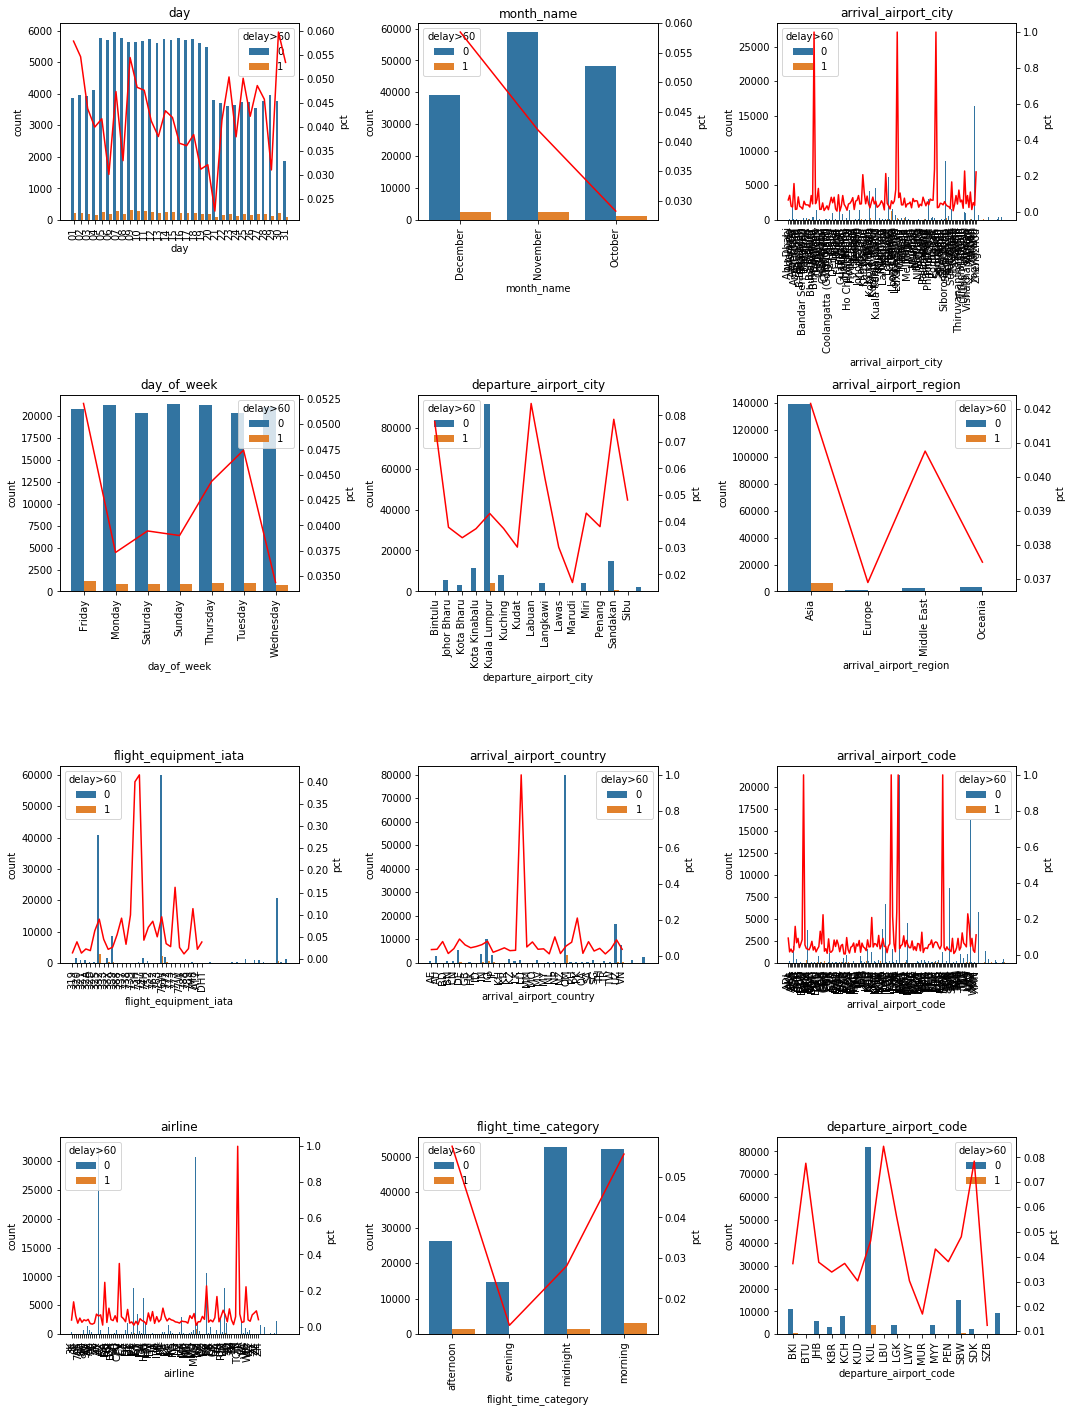

In [39]:
cat_predictors_plotting(flight_df, cat_to_plot, 'delay>60')

#### Detailed Analysis

In [40]:
from ipywidgets import interact

@interact
def interactive_analysis(cat = cat_to_plot, target = 'delay>60'):
    df = flight_df.copy()
    dummy = df.groupby(by = [cat, target]).size().reset_index()
    dummy = dummy.merge(df.groupby(by = cat).size().reset_index(), how = 'left', on = cat)
    dummy['pct'] = dummy['0_x']/dummy['0_y']
    dummy.sort_values(by = cat, inplace = True)
        
    plt.figure(figsize = (7,7))
    plt.title(cat)
    ax = sns.countplot(x = cat, data = df.sort_values(by = cat), hue = target)
    plt.xticks(rotation = 90)
    ax.twinx()
    ax1 = sns.lineplot(x = cat, y = 'pct', data = dummy[dummy[target] == 1], color = 'red')
    plt.xticks(rotation = 90)
    plt.show()

interactive(children=(Dropdown(description='cat', options=('day', 'month_name', 'arrival_airport_city', 'day_o…

##### Airlines

In [41]:
cat = 'airline'
target = 'delay>60'
df = flight_df.copy()
dummy = df.groupby(by = [cat, target]).size().reset_index()
dummy = dummy.merge(df.groupby(by = cat).size().reset_index(), how = 'left', on = cat)
dummy['pct'] = dummy['0_x']/dummy['0_y']
dummy.sort_values(by = cat, inplace = True)
to_plot = dummy.sort_values(by = ['pct','0_y','0_x'], ascending = False).reset_index(drop = True).copy()

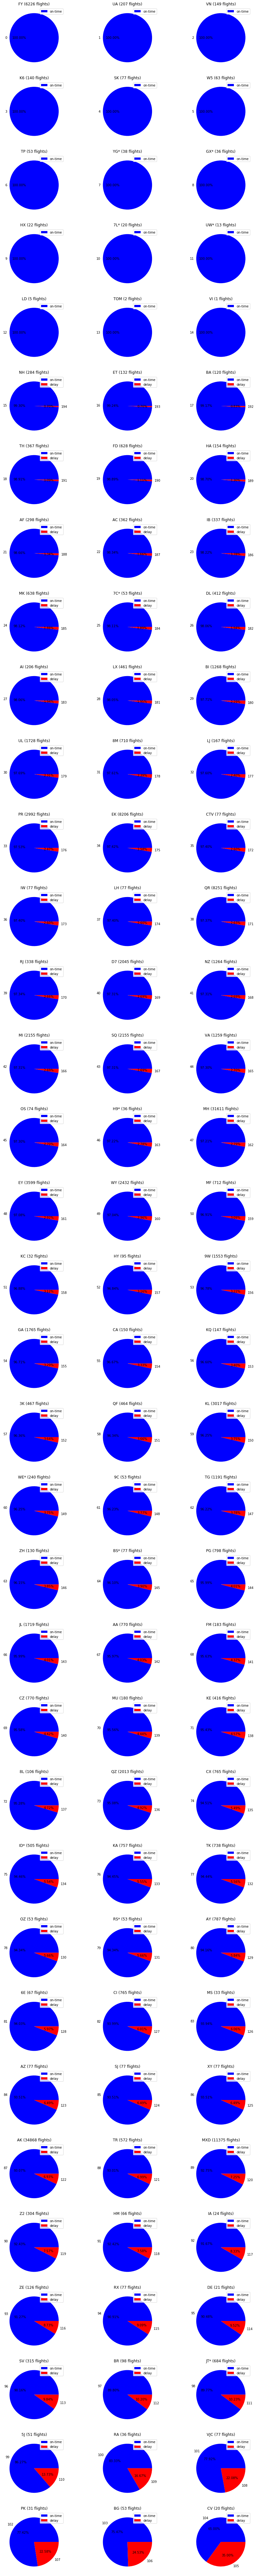

In [42]:
counter = 1
plots_column = 3
plots_row = len(list(to_plot['airline'].unique()))
plt.figure(figsize = (15,450))
for airline in list(to_plot['airline'].unique()):
    plt.subplot(plots_row,plots_column,counter)
    plt.title(airline + ' (' + str(to_plot.loc[to_plot['airline'] == airline,'0_y'].unique()[0]) + ' flights)')
    to_plot[to_plot['airline'] == airline]['0_x'].plot.pie(autopct = '%.2f%%', colors = ['b','r'])
    plt.ylabel(None)
    plt.xlabel(None)
    plt.legend(labels = ['on-time', 'delay'])
    counter += 1
plt.show()

##### Time Category

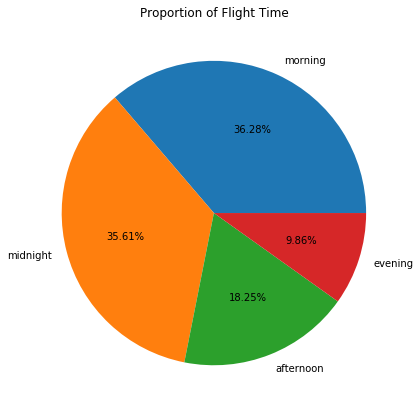

In [43]:
plt.figure(figsize = (7,7))
flight_df['flight_time_category'].value_counts().plot.pie(autopct = '%.2f%%')
plt.ylabel(None)
plt.title('Proportion of Flight Time')
plt.show()

##### Days of Week

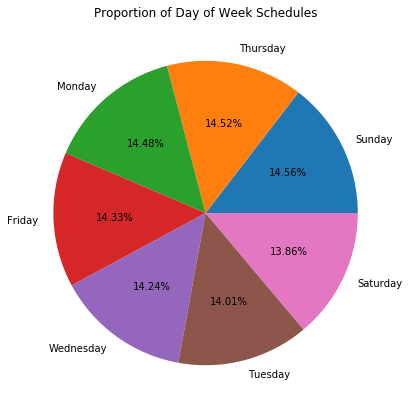

In [44]:
plt.figure(figsize = (7,7))
flight_df['day_of_week'].value_counts().plot.pie(autopct = '%.2f%%')
plt.ylabel(None)
plt.title('Proportion of Day of Week Schedules')
plt.show()

#### Data Transformation

In [45]:
flight_df = pd.concat([flight_df,pd.get_dummies(flight_df[cat_to_plot])], axis = 1)

### Numerical

In [46]:
def plot_correlation_color(df, target):
    plt.figure(figsize = (7,7))
    plt.title('Correlation Values w.r.t Target')
    correlation = df.corr()[target].sort_values()
    limit = 0.1
    mask_red = (correlation > limit)
    mask_green = (correlation <= limit) & (correlation >= -limit)
    mask_blue = (correlation < -limit)
    plt.bar(correlation[mask_blue].index, correlation[mask_blue], color = 'blue')
    plt.bar(correlation[mask_green].index, correlation[mask_green], color = 'green')
    plt.bar(correlation[mask_red].index, correlation[mask_red], color = 'red')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation = 90)
    plt.show()

#### Correlation Matrix

In [47]:
to_compute = list(set(flight_df.columns) - set(['delay>60','id']))

In [48]:
corr_mat = flight_df[to_compute].corr()

In [49]:
corr_coef_target = np.abs(corr_mat['delay']).sort_values(ascending = False)
promising_vars = list(corr_coef_target[corr_coef_target > 0.025].index)

In [50]:
prom_corr_mat = flight_df[promising_vars].corr()

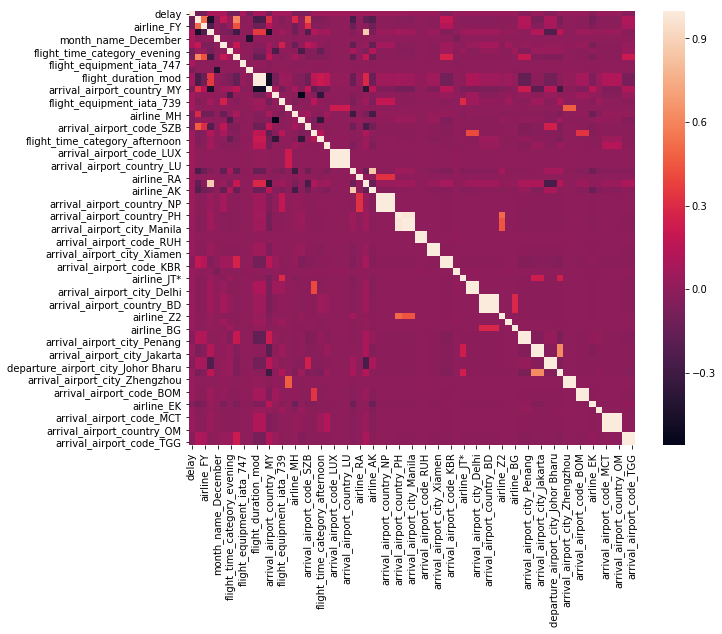

In [51]:
plt.figure(figsize = (10,8))
sns.heatmap(prom_corr_mat)
plt.show()

#### Numerical Distribution Plots

In [52]:
def num_predictors_plotting(df, target, plots_column = 2, kde = True, bins = 10):
    # preparation
    columns = list(df.corr()[target].sort_values().index)
    columns_values = list(df.corr()[target].sort_values().values)
    columns_values = [round(x,3) for x in columns_values]
    
    # plotting
    counter = 1
    plots_row = len(columns)*2
    plt.figure(figsize = (15,5*plots_row))
    for num, corr in zip(columns,columns_values):
        plt.subplot(plots_row, plots_column, counter)
        plt.title(num + ' (' + str(corr) + ')')
        df[num].plot.hist(bins)
        counter += 1
        
        if kde:
            plt.subplot(plots_row,plots_column,counter)
            plt.title(num + ' (KDE plot)')
            sns.kdeplot(df.loc[df[target] == 0,num])
            sns.kdeplot(df.loc[df[target] == 1,num])
            plt.legend(labels = [0,1])
            counter += 1

    plt.tight_layout()

##### Adding Target

In [53]:
promising_vars.append('delay>60')

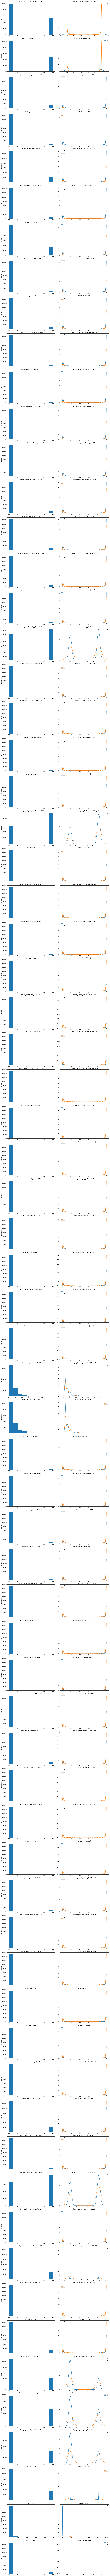

In [54]:
num_predictors_plotting(flight_df[promising_vars], 'delay>60')

#### Detailed Analysis

In [55]:
@interact
def interactive_analysis(column = promising_vars, target = 'delay>60'):
    df = flight_df.copy()
    dummy = df[[column,target]].reset_index(drop = True)
    plt.figure(figsize = (15,7))
    plt.subplot(1,2,1)
    if column == 'delay':
        dummy[column].apply(lambda x: x if x == 0 else np.log10(x)).plot.hist()
    else:
        dummy[column].plot.hist()
    plt.title('Distribution of Delay Duration')
    plt.xlabel('Log10 of Delay Duration (minutes)')

    plt.subplot(1,2,2)
    if column == 'delay':
        sns.kdeplot(dummy.loc[dummy[target] == 0,column].apply(lambda x: x if x == 0 else np.log10(x)))
        sns.kdeplot(dummy.loc[dummy[target] == 1,column].apply(lambda x: x if x == 0 else np.log10(x)))
    else:
        sns.kdeplot(dummy.loc[dummy[target] == 0,column])
        sns.kdeplot(dummy.loc[dummy[target] == 1,column])
    plt.legend(labels = ['on_time','delay'])
    plt.show()

interactive(children=(Dropdown(description='column', options=('delay', 'flight_equipment_iata_AT7', 'airline_F…

## Modeling & Evaluation

### Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lin_reg = LinearRegression()
lin_reg_selected = LinearRegression()

#### Training Dataset Split

In [58]:
# col_to_train = list(set(promising_vars) - set(['delay>60','delay'])) # not used, selecting from all instead
col_to_train = list(set(flight_df.columns) - set(['delay>60','delay']) - set(cat_to_plot) -set(deleted_categorical))

In [59]:
train_mask = (flight_df['month_name'] != 'December')
test_mask = (flight_df['month_name'] == 'December')

In [60]:
X_train = flight_df.loc[train_mask, col_to_train]
Y_train = flight_df.loc[train_mask,'delay']

#### Feature Selection

In [61]:
import statsmodels.api as sm

In [62]:
result = sm.OLS(Y_train,X_train).fit()

display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  delay   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     42.12
Date:                Tue, 05 Nov 2019   Prob (F-statistic):               0.00
Time:                        00:58:40   Log-Likelihood:            -5.1590e+05
No. Observations:              111068   AIC:                         1.033e+06
Df Residuals:                  110716   BIC:                         1.036e+06
Df Model:                         351                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
arrival_airport_city_Kota Kinabalu                0.9338      0.935      0.999      0.318      -0.899       2.766
airline_9C                                       -2.1318      4.490     -0.475      0.635     -10.933       6.669
departure_airport_code_LWY                       -1.0553      1.546     -0.682      0.495      -4.086       1.976
arrival_airport_city_Yogyakarta                  -1.9060      1.103     -1.727      0.084      -4.069       0.257
day_of_week_Wednesday                            -2.3229      0.696     -3.339      0.001      -3.686      -0.960
arrival_airport_code_CNX                         -1.1040      1.283     -0.861      0.389      -3.618       1.410
arrival_airport_code_PNK                          0.4207      1.162      0.362      0.717      -1.858       2.699
arrival_airport_city_Long Akah                   -2.7784      4.014     -0.692      0.489     -10.646       5.089
airline_CX                                       -5.9680      1.405     -4.247      0.000      -8.722      -3.214
arrival_airport_city_Marudi                      -4.0583      2.325     -1.746      0.081      -8.615       0.498
arrival_airport_city_Sihanoukville               -4.1745      1.512     -2.760      0.006      -7.139      -1.210
arrival_airport_code_BKI                          0.9338      0.935      0.999      0.318      -0.899       2.766
departure_airport_city_Johor Bharu               -0.0447      0.527     -0.085      0.932      -1.077       0.988
day_11                                            0.5896      0.513      1.149      0.251      -0.416       1.596
airline_RX                                        1.0465     28.160      0.037      0.970     -54.147      56.240
arrival_airport_code_LBU                          0.8309      0.989      0.840      0.401      -1.107       2.769
arrival_airport_code_PQC                         -1.3445      2.641     -0.509      0.611      -6.520       3.831
airline_TH                                        6.4177     10.560      0.608      0.543     -14.280      27.115
flight_equipment_iata_762                        14.7922     10.314      1.434      0.152      -5.423      35.008
arrival_airport_city_Chengdu                     -1.5952      1.297     -1.230      0.219      -4.137       0.946
arrival_airport_city_Sarikei                     -5.2660      2.658     -1.981      0.048     -10.476      -0.056
arrival_airport_city_Tashkent                    10.7788      2.756      3.911      0.000       5.377      16.180
arrival_airport_city_Tianjin                    -11.1935      3.547     -3.156      0.002     -18.146      -4.241
arrival_airport_code_DMK                          1.5799      0.715      2.210      0.027       0.179       2.981
airli

In [63]:
good_predictors = list(result.pvalues[result.pvalues < 0.05].index)

In [64]:
print('You\'re reducing number of columns from %i to %i' %(len(col_to_train),len(good_predictors)))

You're reducing number of columns from 587 to 245


In [65]:
X_train_selected = X_train[good_predictors]

#### Model Fit

In [66]:
lin_reg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
lin_reg_selected.fit(X_train_selected,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Evaluation

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
X_test = flight_df.loc[test_mask, col_to_train]
Y_test = flight_df.loc[test_mask,'delay']

In [69]:
X_test_selected = X_test[good_predictors]

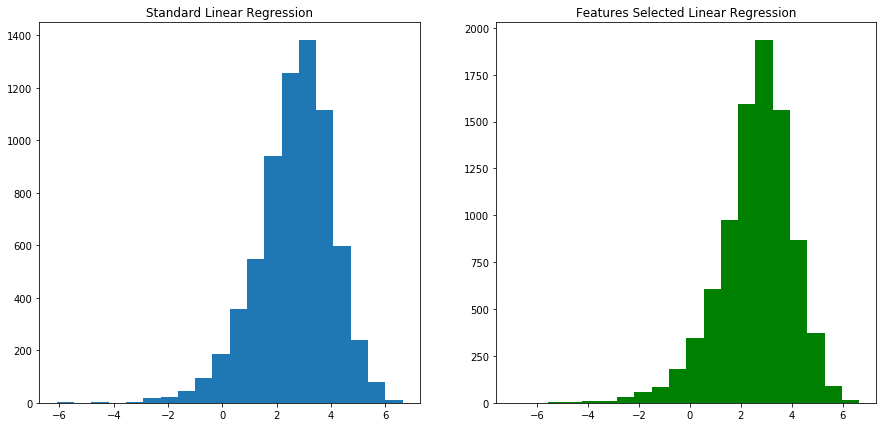

In [70]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Standard Linear Regression')
plt.hist(np.log(Y_test - lin_reg.predict(X_test)), bins = 20)

plt.subplot(1,2,2)
plt.title('Features Selected Linear Regression')
plt.hist(np.log(Y_test - lin_reg_selected.predict(X_test_selected)), bins = 20, color = 'green')
plt.show()

In [73]:
MSE_standard = mean_squared_error(Y_test,lin_reg.predict(X_test))
MSE_selected = mean_squared_error(Y_test,lin_reg_selected.predict(X_test_selected))
print('Your final MSE: %.2f compared to the MSE of standard model: %.2f' %(MSE_selected, MSE_standard))

Your final MSE: 975.88 compared to the MSE of standard model: 1079.02


In [74]:
r2_standard = r2_score(Y_test,lin_reg.predict(X_test))
r2_selected = r2_score(Y_test,lin_reg_selected.predict(X_test_selected))
print('Your final R-squared: %.5f compared to the R-squared of standard model: %.5f' %(r2_selected, r2_standard))

Your final R-squared: -0.00524 compared to the R-squared of standard model: -0.11148


###### Evaluating Predictors

In [75]:
from tqdm import tqdm_notebook as tqdm

In [76]:
# removing multicollinearity
premium_predictors = []
target = 'delay'
Y_target = flight_df[target].values
for predictor in tqdm(good_predictors, total=len(good_predictors), leave=False):
    if len(premium_predictors) == 0: # adding first predictor
        premium_predictors.append(predictor)
    else:
        iterators = premium_predictors
        correlations = []
        for i in np.arange(0, len(iterators)): # calculating all correlations
            X = flight_df[predictor].values
            Y = flight_df[iterators[i]].values
            correlation = np.corrcoef(X,Y)[0,1]
            correlations.append(correlation)
        
        corr_with_target = np.corrcoef(X,Y_target)[0,1]
        if (np.max(np.abs(correlations)) < 0.4) & (np.abs(corr_with_target) > 0.025): # selecting predictors
            premium_predictors.append(predictor)

In [77]:
print('You\'re reducing number of columns from %i to %i' %(len(good_predictors),len(premium_predictors)))

You're reducing number of columns from 245 to 28


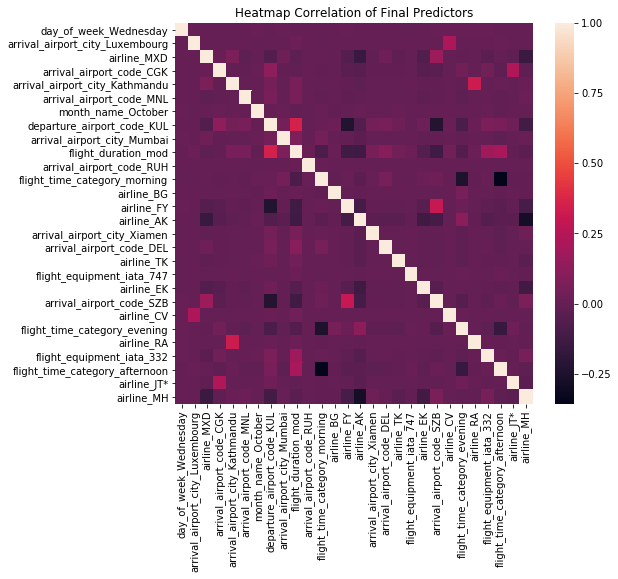

In [78]:
plt.figure(figsize = (8,7))
plt.title('Heatmap Correlation of Final Predictors')
sns.heatmap(flight_df[premium_predictors].corr())
plt.show()

#### Model Fit II

In [79]:
X_train_selected = X_train[premium_predictors]
X_test_selected = X_test[premium_predictors]

In [80]:
lin_reg_selected.fit(X_train_selected,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

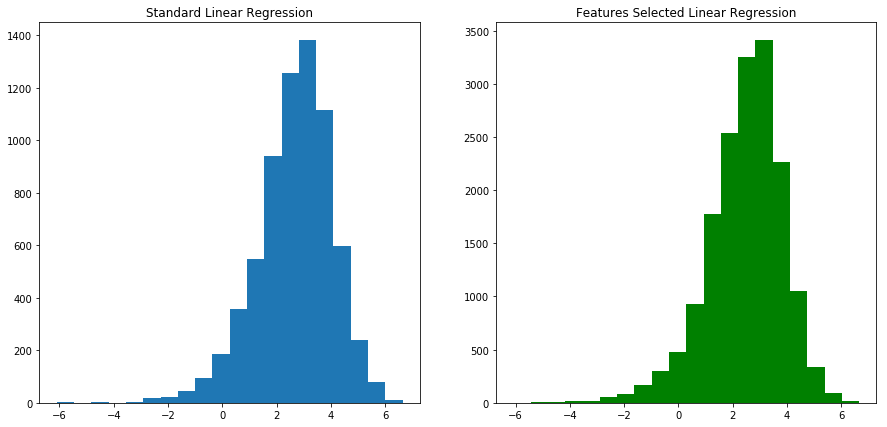

In [81]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
plt.title('Standard Linear Regression')
plt.hist(np.log(Y_test - lin_reg.predict(X_test)), bins = 20)

plt.subplot(1,2,2)
plt.title('Features Selected Linear Regression')
plt.hist(np.log(Y_test - lin_reg_selected.predict(X_test_selected)), bins = 20, color = 'green')
plt.show()

#### Evaluation II

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

In [83]:
MSE_standard = mean_squared_error(Y_test,lin_reg.predict(X_test))
MSE_selected = mean_squared_error(Y_test,lin_reg_selected.predict(X_test_selected))
print('Your final MSE: %.2f compared to the MSE of standard model: %.2f' %(MSE_selected, MSE_standard))

Your final MSE: 922.21 compared to the MSE of standard model: 1079.02


In [84]:
r2_standard = r2_score(Y_test,lin_reg.predict(X_test))
r2_selected = r2_score(Y_test,lin_reg_selected.predict(X_test_selected))
print('Your final R-squared: %.5f compared to the R-squared of standard model: %.5f' %(r2_selected, r2_standard))

Your final R-squared: 0.05005 compared to the R-squared of standard model: -0.11148


#### Final Predictors

In [85]:
list(np.sort(premium_predictors))

['airline_AK',
 'airline_BG',
 'airline_CV',
 'airline_EK',
 'airline_FY',
 'airline_JT*',
 'airline_MH',
 'airline_MXD',
 'airline_RA',
 'airline_TK',
 'arrival_airport_city_Kathmandu',
 'arrival_airport_city_Luxembourg',
 'arrival_airport_city_Mumbai',
 'arrival_airport_city_Xiamen',
 'arrival_airport_code_CGK',
 'arrival_airport_code_DEL',
 'arrival_airport_code_MNL',
 'arrival_airport_code_RUH',
 'arrival_airport_code_SZB',
 'day_of_week_Wednesday',
 'departure_airport_code_KUL',
 'flight_duration_mod',
 'flight_equipment_iata_332',
 'flight_equipment_iata_747',
 'flight_time_category_afternoon',
 'flight_time_category_evening',
 'flight_time_category_morning',
 'month_name_October']

### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

#### Train-Test Dataset

In [87]:
X_train.head(3)

,arrival_airport_city_Kota Kinabalu,airline_9C,departure_airport_code_LWY,arrival_airport_city_Yogyakarta,day_of_week_Wednesday,arrival_airport_code_CNX,arrival_airport_code_PNK,arrival_airport_city_Long Akah,airline_CX,arrival_airport_city_Marudi,...,arrival_airport_city_Auckland,arrival_airport_city_Bhubaneswar,flight_equipment_iata_333,airline_MF,arrival_airport_code_KTE,flight_equipment_iata_ATR,flight_equipment_iata_74H,departure_airport_city_Kudat,arrival_airport_code_ICN,arrival_airport_city_Phuket
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
Y_train = flight_df.loc[train_mask,'delay>60']

In [89]:
X_test.head(3)

,arrival_airport_city_Kota Kinabalu,airline_9C,departure_airport_code_LWY,arrival_airport_city_Yogyakarta,day_of_week_Wednesday,arrival_airport_code_CNX,arrival_airport_code_PNK,arrival_airport_city_Long Akah,airline_CX,arrival_airport_city_Marudi,...,arrival_airport_city_Auckland,arrival_airport_city_Bhubaneswar,flight_equipment_iata_333,airline_MF,arrival_airport_code_KTE,flight_equipment_iata_ATR,flight_equipment_iata_74H,departure_airport_city_Kudat,arrival_airport_code_ICN,arrival_airport_city_Phuket
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
Y_test = flight_df.loc[test_mask,'delay>60']

#### Model

In [91]:
logit = LogisticRegression()
logit_selected = LogisticRegression()

In [92]:
logit.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
logit_selected.fit(X_train[premium_predictors], Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Evaluation

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

In [95]:
Y_pred = logit.predict(X_test)
Y_pred_sel = logit_selected.predict(X_test[premium_predictors])

##### Standard Logit

In [96]:
print(confusion_matrix(Y_test,Y_pred))

[[39126     0]
 [ 2431     0]]


In [97]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     39126
           1       0.00      0.00      0.00      2431

   micro avg       0.94      0.94      0.94     41557
   macro avg       0.47      0.50      0.48     41557
weighted avg       0.89      0.94      0.91     41557



##### Feature Selected Logit

In [98]:
print(confusion_matrix(Y_test,Y_pred_sel))

[[39112    14]
 [ 2422     9]]


In [99]:
print(classification_report(Y_test,Y_pred_sel))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     39126
           1       0.39      0.00      0.01      2431

   micro avg       0.94      0.94      0.94     41557
   macro avg       0.67      0.50      0.49     41557
weighted avg       0.91      0.94      0.91     41557



### XGBoost

## Conclusion